### Reconstruction of Image A with nnf obtained from Image A and Image B.

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from nnf import NNF

In [32]:
def reconstruct_img(img1, img2, patch_w=7, pm_iters=5):
    """
    Reconstruct the image using the nearest neighbor field
    """
    h, w = img1.shape[:2]
    output = img1.copy()
    patch_match = NNF(img1, img2, patch_w=patch_w, pm_iters=pm_iters)
    nnf, nnf_dist = patch_match.compute_nnf()

    for ay in range(h - 7 + 1):
        for ax in range(w - 7 + 1):
            bx, by = nnf[ay, ax]
            output[ay:ay + 7, ax:ax + 7] = img2[by:by + 7, bx:bx + 7]

    return output

In [33]:
def reconstruct_img_average(img1, img2, patch_w=7, pm_iters=5):
    """
    Reconstruct the image by averaging pixels from all the patches it is a part of.
    """
    h, w = img1.shape[:2]
    output = np.zeros_like(img1, dtype=np.float32)
    count = np.zeros_like(img1, dtype=np.float32)
    
    patch_match = NNF(img1, img2, patch_w=patch_w, pm_iters=pm_iters)
    nnf, nnf_dist = patch_match.compute_nnf()
    
    for ay in range(h - patch_w + 1):
        for ax in range(w - patch_w + 1):
            bx, by = nnf[ay, ax]
            
            output[ay:ay + patch_w, ax:ax + patch_w] += img2[by:by + patch_w, bx:bx + patch_w]
            count[ay:ay + patch_w, ax:ax + patch_w] += 1
    
    output /= count
        
    return output.astype(np.uint8)


In [34]:
def plot_reconstructed_images(img1, img2, recon):    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Image A')
    ax[0].axis('off')

    ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Image B')
    ax[1].axis('off')

    ax[2].imshow(cv2.cvtColor(recon, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Reconstructed Image A using Image B')
    ax[2].axis('off')

    plt.show()

In [35]:
a = cv2.imread('../images/a.png')
b = cv2.imread('../images/b.png')

In [36]:
recon_a = reconstruct_img(a, b)

Iteration 0 done in 7.222582 seconds
Iteration 1 done in 7.158446 seconds
Iteration 2 done in 7.042172 seconds
Iteration 3 done in 7.040034 seconds
Iteration 4 done in 6.993843 seconds


In [37]:
recon_a_using_avg = reconstruct_img_average(a, b)

Iteration 0 done in 7.144084 seconds
Iteration 1 done in 7.296015 seconds
Iteration 2 done in 7.225879 seconds
Iteration 3 done in 7.058575 seconds
Iteration 4 done in 7.176839 seconds


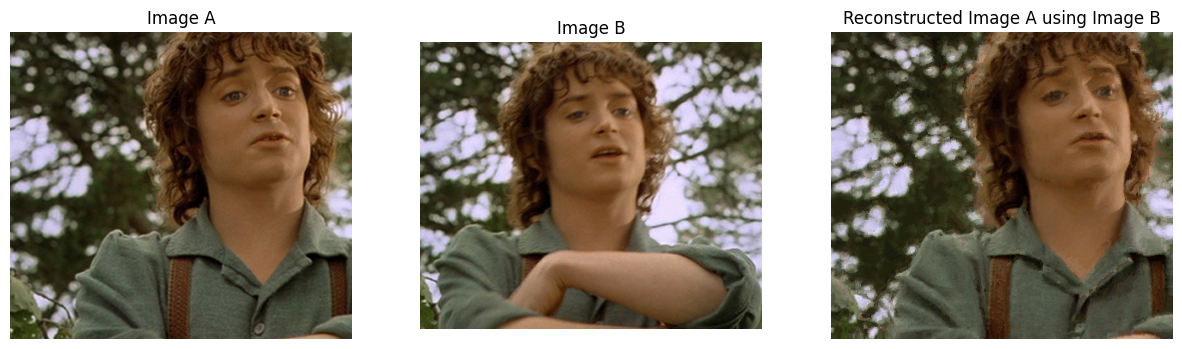

In [38]:
plot_reconstructed_images(a, b, recon_a)


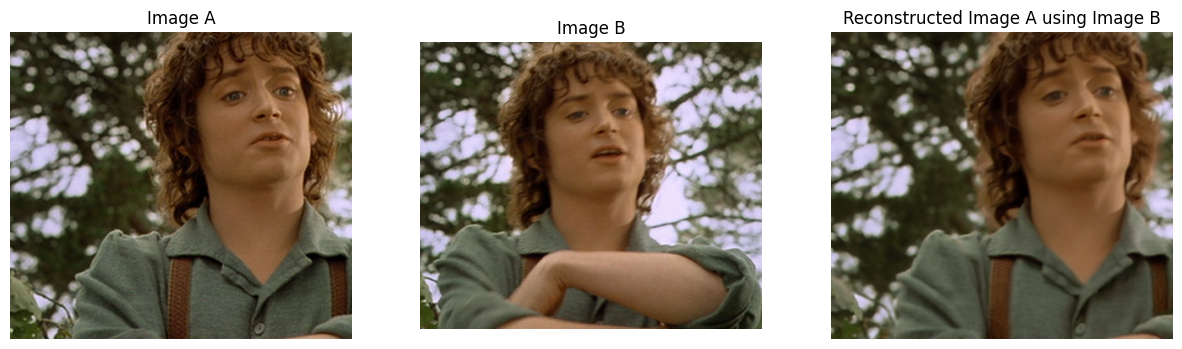

In [39]:
plot_reconstructed_images(a, b, recon_a_using_avg)

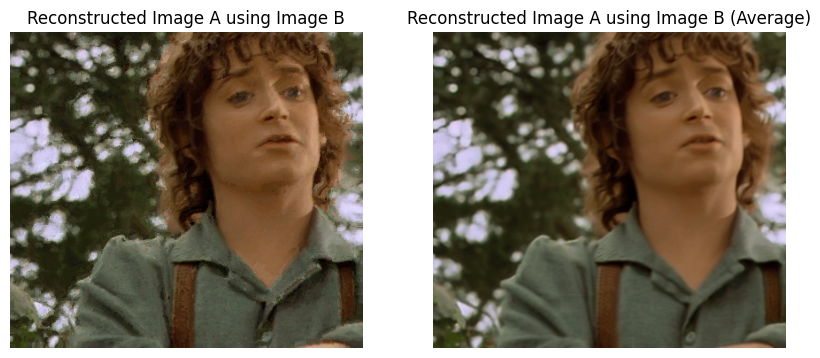

In [40]:
# compare the two methods
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(recon_a, cv2.COLOR_BGR2RGB))
ax[0].set_title('Reconstructed Image A using Image B')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(recon_a_using_avg, cv2.COLOR_BGR2RGB))
ax[1].set_title('Reconstructed Image A using Image B (Average)')
ax[1].axis('off')

plt.show()